In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [3]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

In [4]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [6]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))



1875/1875 [==============================] - 65s 21ms/step - loss: 0.1434 - accuracy: 0.9567 - val_loss: 0.0460 - val_accuracy: 0.9846


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - loss: 0.0460 - accuracy: 0.9846 - 2s/epoch - 6ms/step
Test accuracy: 0.9846000075340271


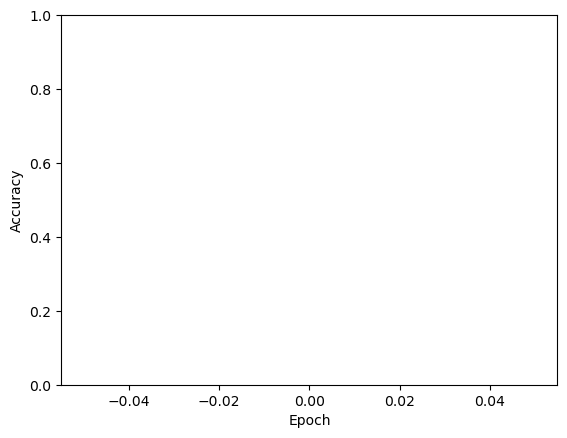

In [12]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
#plt.legend(loc='lower right')
plt.show()

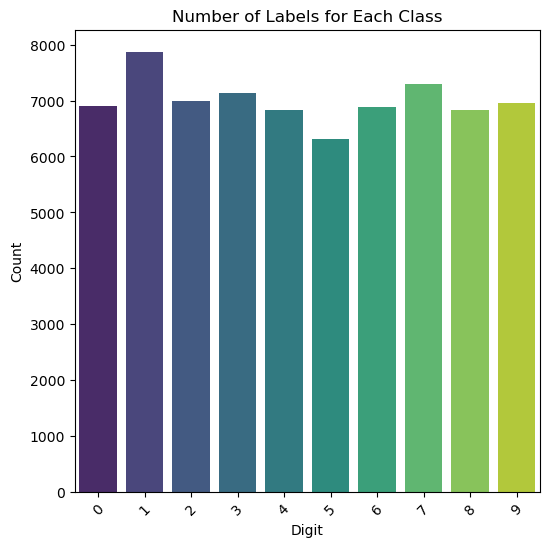

In [10]:



# Combine train and test labels for a comprehensive plot
all_labels = list(train_labels) + list(test_labels)

# Create a DataFrame for easier plotting with Seaborn
df = pd.DataFrame({'Label': all_labels})

# Plot using Seaborn
plt.figure(figsize=(6, 6))
sns.countplot(x='Label', data=df, palette='viridis')
plt.title('Number of Labels for Each Class')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


313/313 [==============================] - 5s 10ms/step


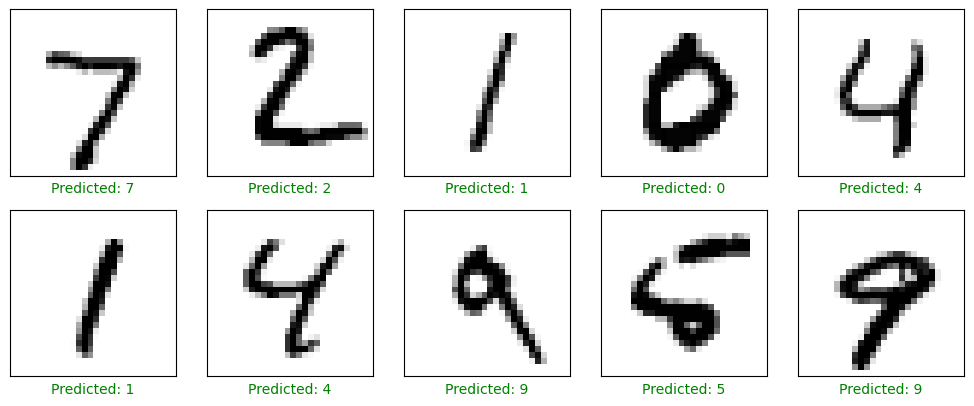

In [11]:
# Predict the labels for test images
predictions = model.predict(test_images)

# Function to plot the test images with predicted labels
def plot_images(images, labels, predictions, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel(f"Predicted: {predicted_label}", color=color)
    plt.tight_layout()
    plt.show()

# Plot the first 10 test images with their predicted labels
plot_images(test_images.squeeze(), test_labels, predictions, num_images=10)
